# <U>EXPLORATORY DATA ANALYSIS</U>

## 0. Pre-processing
## 1. Analysis
## 2. Feature Engineering
## 3. Handling Outliers

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
df=sns.load_dataset('titanic')

In [21]:
df.sample(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
757,0,2,male,18.0,0,0,11.5000,S,Second,man,True,NaN,Southampton,no,True
149,0,2,male,42.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
507,1,1,male,NaN,0,0,26.5500,S,First,man,True,NaN,Southampton,yes,True
857,1,1,male,51.0,0,0,26.5500,S,First,man,True,E,Southampton,yes,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
339,0,1,male,45.0,0,0,35.5000,S,First,man,True,NaN,Southampton,no,True
583,0,1,male,36.0,0,0,40.1250,C,First,man,True,A,Cherbourg,no,True
580,1,2,female,25.0,1,1,30.0000,S,Second,woman,False,NaN,Southampton,yes,False
616,0,3,male,34.0,1,1,14.4000,S,Third,man,True,NaN,Southampton,no,False
823,1,3,female,27.0,0,1,12.4750,S,Third,woman,False,E,Southampton,yes,False


In [22]:
df.shape

(891, 15)

In [23]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## Categorical
* survived
* pclass
* sex
* sibsp
* parch
* categorical
* class
* who
* adult_male

## Numerical
* age
* numerical

## mixed


In [24]:
df['sibsp'].value_counts()

sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [26]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [27]:
df.drop(columns=['deck'],inplace=True)

In [28]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [29]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [30]:
df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [31]:
df['embarked'].fillna('S',inplace=True)

In [32]:
df.drop(columns=['embark_town'],inplace=True)

In [33]:
df['survived']=df['survived'].astype('category')
df['pclass']=df['pclass'].astype('category')
df['sex']=df['sex'].astype('category')
df['age']=df['age'].astype('int')
df['embarked']=df['embarked'].astype('category')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    category
 1   pclass      891 non-null    category
 2   sex         891 non-null    category
 3   age         891 non-null    int32   
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    category
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    object  
 12  alone       891 non-null    bool    
dtypes: bool(2), category(5), float64(1), int32(1), int64(2), object(2)
memory usage: 45.1+ KB


In [35]:
df.describe()

,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.544332,0.523008,0.381594,32.204208
std,13.013778,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


### Conclusion

# Analysis

No of people survived are 62 %


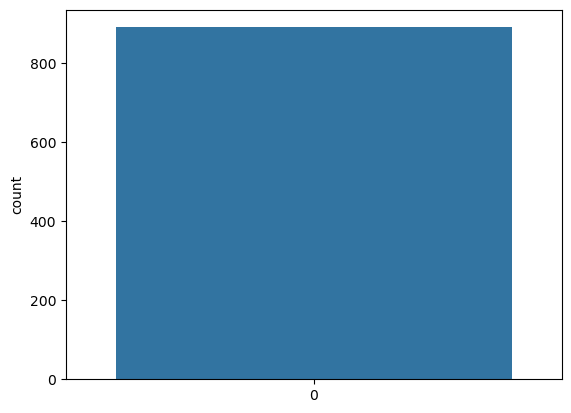

In [40]:
#Survived
sns.countplot(df['survived'])
print('No of people survived are',round(df['survived'].value_counts().values[0]*100/891),'%')

In [19]:
df['survived'].value_counts().values[0]

549

In [ ]:
#pclass
sns.countplot(df['pclass'])
print(round(df['pclass'].value_counts()*100/891),'%')

In [ ]:
df['survived'].value_counts()

In [ ]:
df.columns

In [ ]:
#sex
sns.countplot(df['sex'])
print(round(df['sex'].value_counts()*100/891),'%')

In [ ]:
#age
sns.distplot(df.age)
print(df.age.skew())

In [ ]:
sns.boxplot(df.age)

In [ ]:
#sibsp
sns.countplot(df['sibsp'])
print(round(df['sibsp'].value_counts()*100/891),'%')

In [ ]:
#parch
sns.countplot(df['parch'])
print(round(df['parch'].value_counts()*100/891),'%')

In [ ]:
 #fare
sns.distplot(df.fare)

### Multivariate Analysis

In [ ]:
#survival with pclass
sns.countplot(df.survived,hue=df.pclass)

import pandas as pd
pd.crosstab(df.pclass,df.survived).apply(lambda r: r*100/r.sum(),axis=1)


In [ ]:
#survival with sex
sns.countplot(df.survived,hue=df.sex)

pd.crosstab(df.sex,df.survived).apply(lambda r: r*100/r.sum(),axis=1)


In [ ]:
#survival with embarked
sns.countplot(df.survived,hue=df.embarked)

pd.crosstab(df.embarked,df.survived).apply(lambda r: r*100/r.sum(),axis=1)


In [ ]:
#survival with age
sns.distplot(df[df.survived==0].age)
sns.distplot(df[df.survived==1].age)


In [ ]:
#survival with fare
sns.distplot(df[df.survived==0].fare)
sns.distplot(df[df.survived==1].fare)


In [ ]:
sns.heatmap(df.corr(),annot=True)

# Feature Engineering

In [ ]:
df['family_size']=df['parch']+df['sibsp']

In [ ]:
df.sample(5)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    category
 1   pclass      891 non-null    category
 2   sex         891 non-null    category
 3   age         891 non-null    int32   
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    category
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    object  
 12  alone       891 non-null    bool    
dtypes: bool(2), category(5), float64(1), int32(1), int64(2), object(2)
memory usage: 45.1+ KB


In [38]:
df['survived']=df['survived'].astype('category')
df['pclass']=df['pclass'].astype('category')
df['sex']=df['sex'].astype('category')
df['age']=df['age'].astype('int')
df['embarked']=df['embarked'].astype('category')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    category
 1   pclass      891 non-null    category
 2   sex         891 non-null    category
 3   age         891 non-null    int32   
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    category
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    object  
 12  alone       891 non-null    bool    
dtypes: bool(2), category(5), float64(1), int32(1), int64(2), object(2)
memory usage: 45.1+ KB
